In [1]:
# Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import joblib

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
data = pd.read_excel('Data_Atlanta_West.xlsx', sheet_name='Sheet1')

In [3]:
cols = ['RATE DAY','RATE MILE', 'SumOfFLEET Gas', 'SumOfFLEET Parcel', 'SumOfFLEET All','Utilization Rate All']

df = data[cols]

#df.loc[:, 'DATE OUT'] = df['DATE OUT'].astype('int64').astype('float64')

print(df.dtypes)

RATE DAY                float64
RATE MILE               float64
SumOfFLEET Gas            int64
SumOfFLEET Parcel         int64
SumOfFLEET All            int64
Utilization Rate All    float64
dtype: object


In [4]:
#%% train and test sets

split = int(.8*len(df))

X_train = df.loc[:split,:].drop(['Utilization Rate All'],axis=1)
y_train = df.loc[:split,'Utilization Rate All']

X_test = df.loc[split:,:].drop(['Utilization Rate All'],axis=1)
y_test = df.loc[split:,'Utilization Rate All']


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

# Calculate the mean squared error for the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")

r_squared = r2_score(y_test, y_pred_lr)
print("R-squared:", r_squared)

# Sorting the coefficients in descending order
sorted_coeffs = sorted(zip(X_train.columns, lr.coef_), key=lambda x: x[1], reverse=True)

# Print the intercept
print("Intercept:", lr.intercept_)

# Print the sorted coefficients for each feature
for feature, coef in sorted_coeffs:
    print(f"{feature}: {coef}")


print('________________________________________________')

Linear Regression MSE: 0.005661527447530365
R-squared: 0.1732677064788244
Intercept: 0.5808179692063071
RATE MILE: 0.05392415183340082
SumOfFLEET All: 0.004619538760747208
RATE DAY: 0.00089317801069439
SumOfFLEET Gas: -0.004189210731643529
SumOfFLEET Parcel: -0.0045896477223197115
________________________________________________


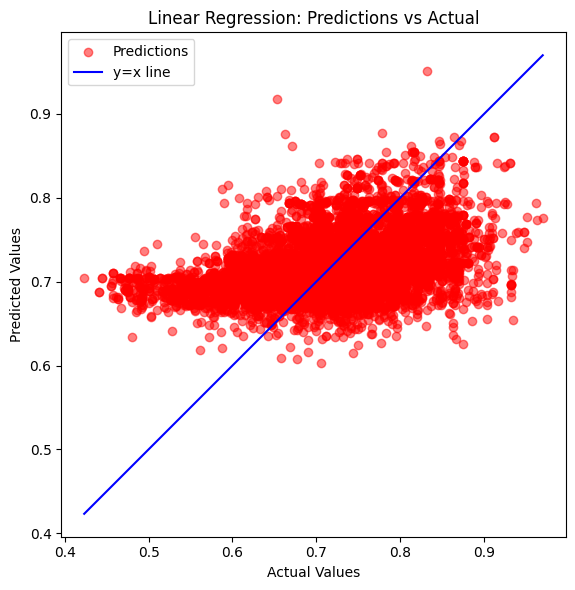

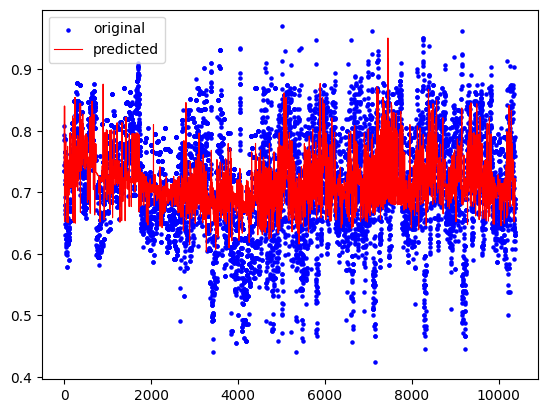

In [13]:
import matplotlib.pyplot as plt

#Random Forest Predictions vs Actual
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='red', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', label='y=x line')
plt.title('Linear Regression: Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.axis('square')

plt.tight_layout()
plt.show()

lr_x_ax = range(len(y_test))
plt.scatter(lr_x_ax, y_test, s=5, color="blue", label="original")
plt.plot(lr_x_ax, y_pred_lr, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [6]:
features = df.drop('Utilization Rate All', axis=1)
labels = df['Utilization Rate All']

# Split the data into training and test sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 43)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

feature_list = list(features.columns)


Training Features Shape: (41527, 5)
Training Labels Shape: (41527,)
Testing Features Shape: (10382, 5)
Testing Labels Shape: (10382,)


In [7]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 43)
# Train the model on training data
rf.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
mse_rf = mean_squared_error(test_labels, predictions)
print(f"RandomForest MSE: {mse_rf}")
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
from sklearn.metrics import r2_score
score = r2_score(test_labels, predictions)
print("The accuracy of our model is {}%".format(round(score, 2) *100))


Mean Absolute Error: 0.01 degrees.
RandomForest MSE: 0.000844012488602341
Accuracy: 97.92 %.
The accuracy of our model is 88.0%


In [8]:
joblib.dump(rf, "./random_forest.joblib", compress=3)

['./random_forest.joblib']

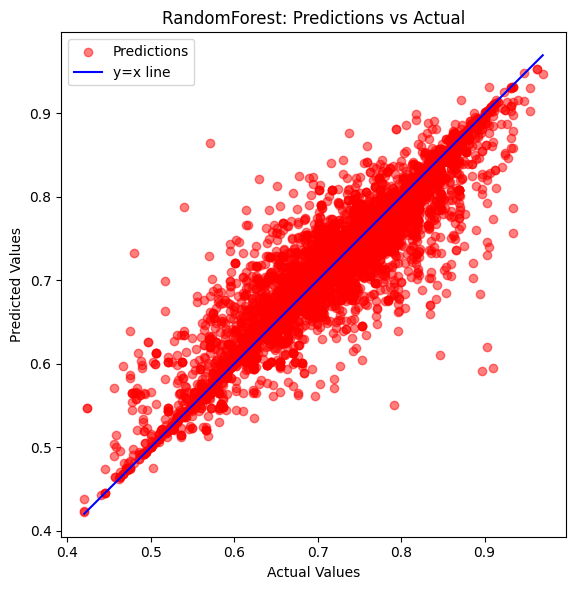

In [9]:
import matplotlib.pyplot as plt

#Random Forest Predictions vs Actual
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(test_labels, predictions, color='red', alpha=0.5, label='Predictions')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='blue', label='y=x line')
plt.title('RandomForest: Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.axis('square')

plt.tight_layout()
plt.show()

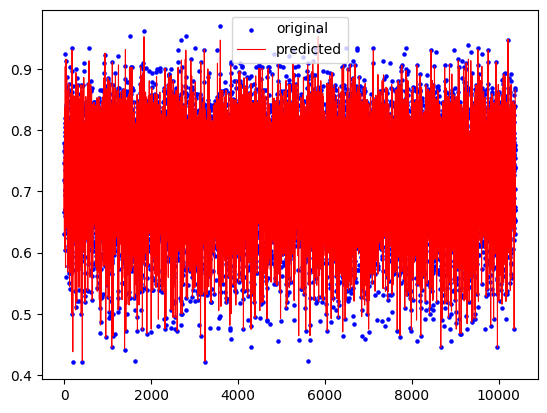

In [10]:
rf_x_ax = range(len(test_labels))
plt.scatter(rf_x_ax, test_labels, s=5, color="blue", label="original")
plt.plot(rf_x_ax, predictions, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

MSE: 0.00


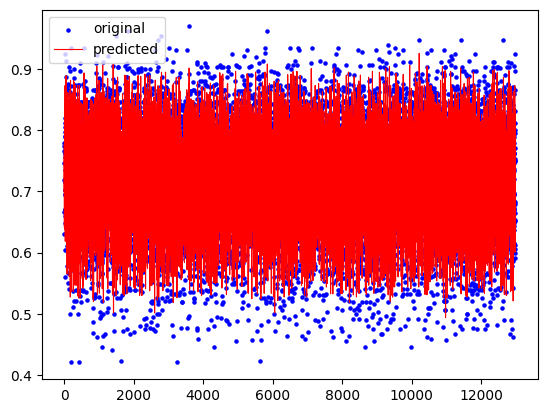

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
x = df.drop('Utilization Rate All', axis=1)
y = df['Utilization Rate All']

xtrain, xtest, ytrain, ytest=train_test_split(x, y, random_state=43, 
             test_size=0.25)
# with new parameters
gbr = GradientBoostingRegressor(n_estimators=1000, 
    max_depth=8, 
    learning_rate=0.01, 
    min_samples_split=2)
# with default parameters
#gbr = GradientBoostingRegressor()

gbr.fit(xtrain, ytrain)

ypred = gbr.predict(xtest)
mse = mean_squared_error(ytest,ypred)
print("MSE: %.2f" % mse)

x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

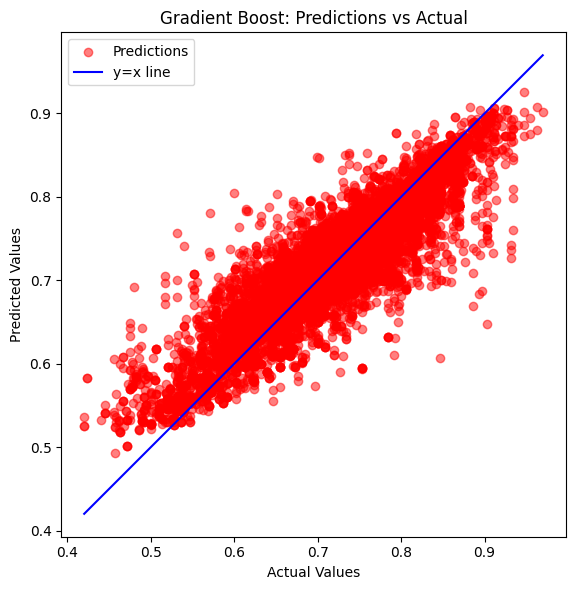

Mean Absolute Error: 0.03 degrees.
Accuracy: 96.04 %.
The accuracy of our model is 80.0%


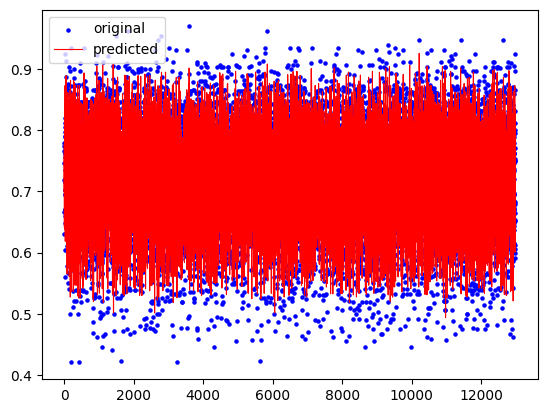

In [14]:
import matplotlib.pyplot as plt

#Random Forest Predictions vs Actual
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(ytest, ypred, color='red', alpha=0.5, label='Predictions')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='blue', label='y=x line')
plt.title('Gradient Boost: Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.axis('square')

plt.tight_layout()
plt.show()

# Calculate the absolute errors
errors = abs(ypred - ytest)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / ytest)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
score_gf = r2_score(ytest, ypred)
print("The accuracy of our model is {}%".format(round(score_gf, 2) *100))

gb_x_ax = range(len(ytest))
plt.scatter(gb_x_ax, ytest, s=5, color="blue", label="original")
plt.plot(gb_x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()